# Analysis of Sorting Algorithms
Submitted towards Data Structures and Algorithms course assignment

## Team
- Krisha Vardhni M CB.EN.U4CSE20633
- Deebakkarthi C R CB.EN.U4CSE20613
- Devaraja G CB.EN.U4CSE20614

## Algorithms
- Bubble Sort
- Insertion Sort
- Selection Sort
- Merge Sort
- Quick Sort

In [48]:
import random
import time
import tracemalloc
import numpy as np
import matplotlib.pyplot as plt

In [49]:
def genShuffledArrays(n):
    suffledArrayCollection = []

    for i in range(1,n+1):
        arrayitem = list(range(1, i+1))
        random.shuffle(arrayitem)
        suffledArrayCollection.append(arrayitem)

    return suffledArrayCollection

shuffledArrayCollection = genShuffledArrays(1000) # Array of shuffled arrays from size 1 - 100

In [50]:
def timePlotter(title, times_taken):
  n = np.array(range(1,len(times_taken)+1))
  times_np = np.array(times_taken)
  plt.title(title)
  plt.xlabel("Size of Array")
  plt.ylabel("Measurements")
  plt.plot(n, times_np, color='red', label='Time taken')
  plt.legend()
  plt.show()

def memPlotter(title, mems_taken):
  n = np.array(range(1,len(mems_taken)+1))
  mems_np = np.array(mems_taken)
  plt.title(title)
  plt.xlabel("Size of Array")
  plt.ylabel("Measurements")
  plt.plot(n, mems_np, color='green', label='Memory taken')
  plt.legend()
  plt.show()

def swapPlotter(title, swaps_taken):
  n = np.array(range(1,len(swaps_taken)+1))
  swaps_np = np.array(swaps_taken)
  plt.title(title)
  plt.xlabel("Size of Array")
  plt.ylabel("Measurements")
  plt.plot(n, swaps_np, color='blue', label='Swaps taken')
  plt.legend()
  plt.show()

def iterationPlotter(title, iterations_taken):
  n = np.array(range(1,len(iterations_taken)+1))
  iterations_np = np.array(iterations_taken)
  plt.title(title)
  plt.xlabel("Size of Array")
  plt.ylabel("Measurements")
  plt.plot(n, iterations_np, color='black', label='Iterations taken')
  plt.legend()
  plt.show()

def comparisonPlotter(title, comparisons_taken):
  n = np.array(range(1,len(comparisons_taken)+1))
  comparisons_np = np.array(comparisons_taken)
  plt.title(title)
  plt.xlabel("Size of Array")
  plt.ylabel("Measurements")
  plt.plot(n, comparisons_np, color='yellow', label='Comparisons taken')
  plt.legend()
  plt.show()

def complexityPlotter(title, complexity_taken):
  n = np.array(range(1,len(complexity_taken)+1))
  complexity_np = np.array(complexity_taken)
  plt.title(title)
  plt.xlabel("Size of Array")
  plt.ylabel("Measurements")
  plt.plot(n, complexity_np, color='orange', label='Complexity taken')
  plt.legend()
  plt.show()

In [51]:
def plotter(title, times_taken, mems_taken, swaps_taken, iterations_taken, comparisons_taken, complexity):

    timePlotter(title, times_taken)
    memPlotter(title, mems_taken)
    swapPlotter(title, swaps_taken)
    iterationPlotter(title, iterations_taken)
    comparisonPlotter(title, comparisons_taken)
    complexityPlotter(title, complexity)

In [52]:
def selectionSort(unsortedList):

    # SWAPS
    swaps = 0

    # ITERATIONS
    iterations = 0

    # COMPARISONS
    comparisons = 0 

    # Starting memory tracing
    tracemalloc.start()

    start_time = time.time()

    # Initialize the sorted list as empty
    sortedList = []

    for i in range(len(unsortedList)):
        minIndex = i
        for j in range(i+1, len(unsortedList)):
            iterations += 1
            comparisons += 1
            if unsortedList[minIndex] > unsortedList[j]:
                minIndex=j
        unsortedList[i], unsortedList[minIndex] = unsortedList[minIndex], unsortedList[i]
        swaps += 1

    end_time = time.time()

    # End memory tracing
    mem_taken = list(tracemalloc.get_traced_memory())[1]
    tracemalloc.stop()

    sortedList = unsortedList

    # Total time
    time_taken = end_time - start_time

    return [sortedList, time_taken, mem_taken, swaps, iterations, comparisons]

In [53]:
def selectionSortWrappper():
    times_taken = []
    mems_taken = []
    swaps_taken = []
    iterations_taken = []
    comparisons_taken = []
    complexity = [] # O(n^2) for Selection sort

    for i in range(len(shuffledArrayCollection)):
        [sortedarray, time_taken, mem_taken, swaps, iterations, comparisons]= selectionSort(shuffledArrayCollection[i].copy())
        times_taken.append(time_taken)
        mems_taken.append(mem_taken)
        swaps_taken.append(swaps)
        iterations_taken.append(iterations)
        comparisons_taken.append(comparisons)
        complexity.append(i*i)

        if i==15:
            print("Unsorted array: ", shuffledArrayCollection[i])
            print("Sorted array: ", sortedarray)
            print("Time taken [in ns]: ", time_taken)
            print("Maximum memory taken: ", mem_taken)
            print("Swaps: ", swaps)
            print("Iterations: ", iterations)
            print("Comparisons: ", comparisons)
    return times_taken, mems_taken, swaps_taken, iterations_taken, comparisons_taken, complexity

Unsorted array:  [10, 8, 15, 3, 12, 7, 16, 6, 9, 4, 5, 2, 14, 11, 13, 1]
Sorted array:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Time taken [in ns]:  6.985664367675781e-05
Maximum memory taken:  144
Swaps:  16
Iterations:  120
Comparisons:  120


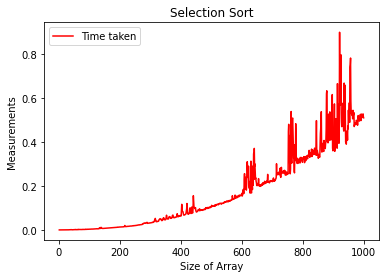

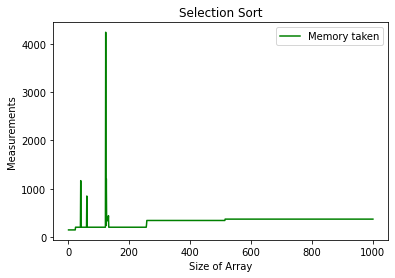

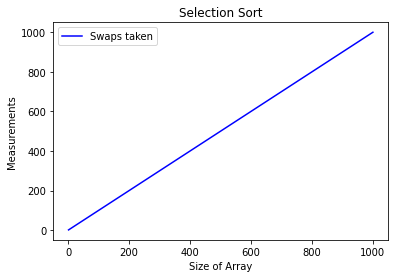

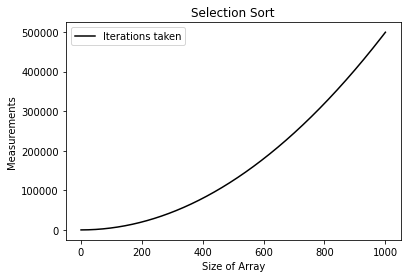

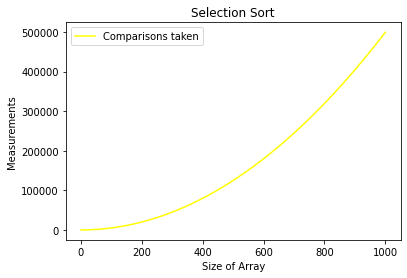

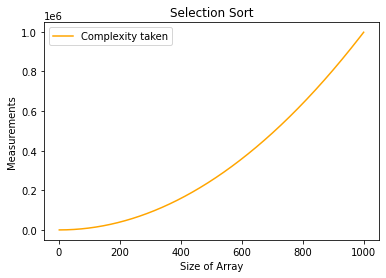

In [54]:
selectionSortResult = selectionSortWrappper()
plotter("Selection Sort", selectionSortResult[0], selectionSortResult[1], selectionSortResult[2], selectionSortResult[3], selectionSortResult[4], selectionSortResult[5])

In [55]:
def bubbleSort(unsortedList):

    # SWAPS
    swaps = 0

    # ITERATIONS
    iterations = 0

    # COMPARISONS
    comparisons = 0

    # Starting time
    start_time = time.time()

    # Starting memory tracing
    tracemalloc.start()

    # Loop through the list
    for i in range(len(unsortedList)):
        iterations+=1
        
        for j in range(len(unsortedList)-1-i):
            iterations+=1
            comparisons+=1
            if unsortedList[j] > unsortedList[j+1]:
                t=unsortedList[j]
                unsortedList[j] = unsortedList[j+1]
                unsortedList[j+1] = t
                swaps+=1
                # print(unsortedList)

    # End memory tracing
    mem_taken = list(tracemalloc.get_traced_memory())[1]
    tracemalloc.stop()

    # End time
    end_time = time.time()

    # Total time
    time_taken = end_time - start_time

    sortedList=unsortedList

    return [sortedList, time_taken, mem_taken, swaps, iterations, comparisons]

In [56]:
def bubbleSortWrappper():
    times_taken = []
    mems_taken = []
    swaps_taken = []
    iterations_taken = []
    comparisons_taken = []
    complexity = [] # O(n^2) for Selection sort

    for i in range(len(shuffledArrayCollection)):
        [sortedarray, time_taken, mem_taken, swaps, iterations, comparisons]= bubbleSort(shuffledArrayCollection[i].copy())
        times_taken.append(time_taken)
        mems_taken.append(mem_taken)
        swaps_taken.append(swaps)
        iterations_taken.append(iterations)
        comparisons_taken.append(comparisons)
        complexity.append(i*i)

        if i==15:
            print("Unsorted array: ", shuffledArrayCollection[i])
            print("Sorted array: ", sortedarray)
            print("Time taken [in ns]: ", time_taken)
            print("Maximum memory taken: ", mem_taken)
            print("Swaps: ", swaps)
            print("Iterations: ", iterations)
            print("Comparisons: ", comparisons)
    return times_taken, mems_taken, swaps_taken, iterations_taken, comparisons_taken, complexity

Unsorted array:  [10, 8, 15, 3, 12, 7, 16, 6, 9, 4, 5, 2, 14, 11, 13, 1]
Sorted array:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Time taken [in ns]:  5.269050598144531e-05
Maximum memory taken:  144
Swaps:  70
Iterations:  136
Comparisons:  120


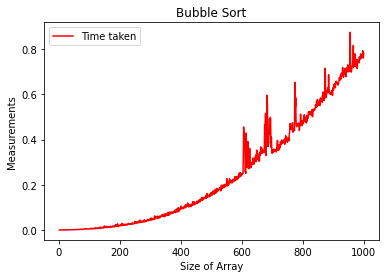

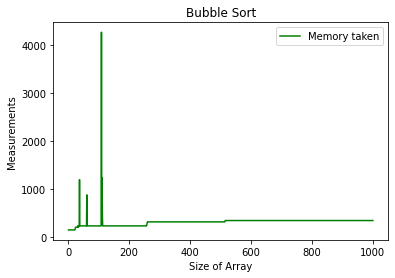

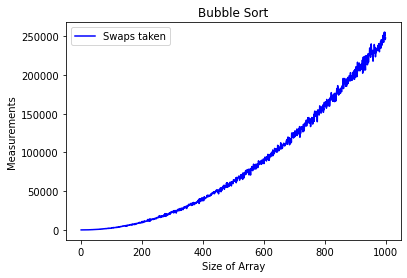

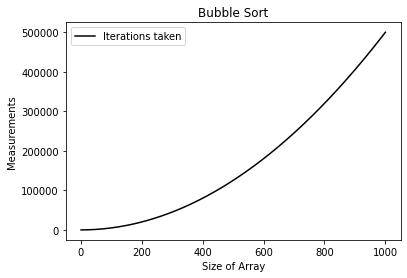

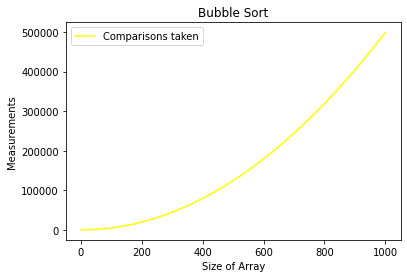

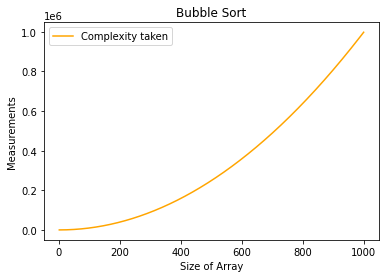

In [57]:
bubbleSortResult = bubbleSortWrappper()
plotter("Bubble Sort", bubbleSortResult[0], bubbleSortResult[1], bubbleSortResult[2], bubbleSortResult[3], bubbleSortResult[4], bubbleSortResult[5])

In [58]:
def insertionSort(unsortedList):

    # SWAPS
    swaps = 0

    # ITERATIONS
    iterations = 0

    # COMPARISONS
    comparisons = 0

    # Starting time
    start_time = time.time()

    # Starting memory tracing
    tracemalloc.start()

    # Loop through the list
    for i in range(1, len(unsortedList)):
        iterations+=1
        key = unsortedList[i]
        ptr=i-1
        comparisons+=1

        while ptr>=0 and unsortedList[ptr]>key:             
          unsortedList[ptr+1]=unsortedList[ptr]
          ptr-=1 
          swaps+=1
          iterations+=1
        
        unsortedList[ptr+1]=key

    # End memory tracing
    mem_taken = list(tracemalloc.get_traced_memory())[1]
    tracemalloc.stop()

    # End time
    end_time = time.time()

    # Total time
    time_taken = end_time - start_time

    sortedList=unsortedList

    return [sortedList, time_taken, mem_taken, swaps, iterations, comparisons]

In [59]:
def insertionSortWrappper():
    times_taken = []
    mems_taken = []
    swaps_taken = []
    iterations_taken = []
    comparisons_taken = []
    complexity = [] # O(n^2) for Selection sort

    for i in range(len(shuffledArrayCollection)):
        [sortedarray, time_taken, mem_taken, swaps, iterations, comparisons]= insertionSort(shuffledArrayCollection[i].copy())
        times_taken.append(time_taken)
        mems_taken.append(mem_taken)
        swaps_taken.append(swaps)
        iterations_taken.append(iterations)
        comparisons_taken.append(comparisons)
        complexity.append(i*i)

        if i==15:
            print("Unsorted array: ", shuffledArrayCollection[i])
            print("Sorted array: ", sortedarray)
            print("Time taken [in ns]: ", time_taken)
            print("Maximum memory taken: ", mem_taken)
            print("Swaps: ", swaps)
            print("Iterations: ", iterations)
            print("Comparisons: ", comparisons)
    return times_taken, mems_taken, swaps_taken, iterations_taken, comparisons_taken, complexity

Unsorted array:  [10, 8, 15, 3, 12, 7, 16, 6, 9, 4, 5, 2, 14, 11, 13, 1]
Sorted array:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Time taken [in ns]:  3.075599670410156e-05
Maximum memory taken:  96
Swaps:  70
Iterations:  85
Comparisons:  15


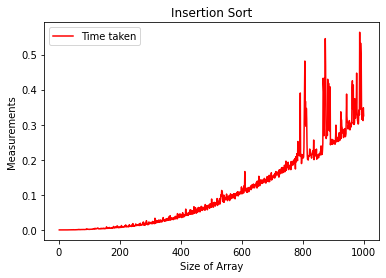

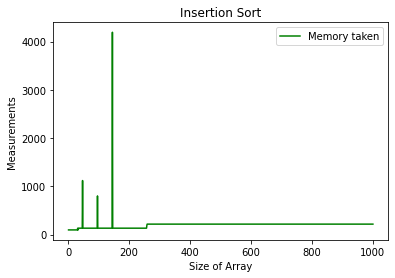

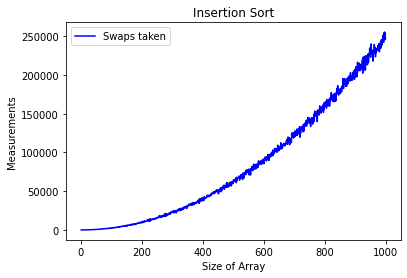

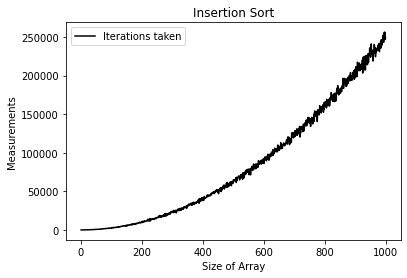

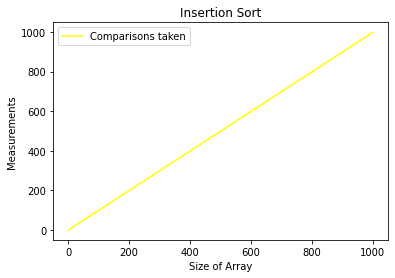

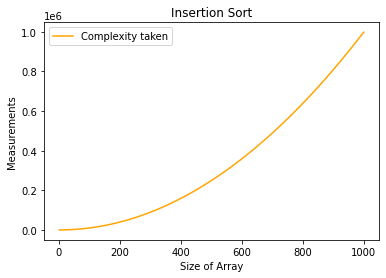

In [60]:
insertionSortResult = insertionSortWrappper()
plotter("Insertion Sort", insertionSortResult[0], insertionSortResult[1], insertionSortResult[2], insertionSortResult[3], insertionSortResult[4], insertionSortResult[5])

In [61]:
def merge_sort(a):
    if len(a) > 1:
        m = len(a)//2
        l = a[:m]
        r = a[m:]
        merge_sort(l)
        merge_sort(r)
        size_l = len(l)
        size_r = len(r)
        i = j = k = 0
        while True:
            if l[i] <= r[j]:
                a[k] = l[i]
                i += 1
                k += 1
                if i == size_l:
                    while j < size_r:
                        a[k] = r[j]
                        j += 1
                        k += 1
                    return 
            else:
                a[k] = r[j]
                j += 1
                k += 1
                if j == size_r:
                    while i < size_l:
                        a[k] = l[i]
                        i += 1
                        k += 1
                    return 
